In [2]:
import pandas as pd
import sqlite3 as sq
conn=sq.connect("factbook.db")
pd.read_sql_query("select * from sqlite_master where type='table'",conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
pd.read_sql_query("select * from facts limit 5",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
pd.read_sql_query("select min(population) from facts",conn)

,min(population)
0,0


In [5]:
pd.read_sql_query("select max(population) from facts",conn)

,max(population)
0,7256490011


In [6]:
pd.read_sql_query("select min(population_growth) from facts",conn)

,min(population_growth)
0,0.0


In [9]:
pd.read_sql_query("select max(population_growth) from facts",conn)

,max(population_growth)
0,4.02


In [10]:
pd.read_sql_query("select * from facts where population =(select min(population) from facts)",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [11]:
pd.read_sql_query("select * from facts where population =(select max(population) from facts)",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


- Outlier countries are the wolrd and Antarctica, World should be eliminated from records as it provides a bias

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f978f332470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f978f20ccf8>]], dtype=object)

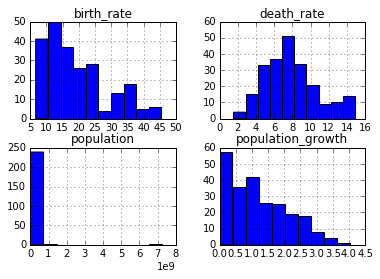

In [15]:
%matplotlib inline
pd.read_sql_query("select population,population_growth,birth_rate,death_rate from facts where population !=(select min(population) from facts) or population !=(select max(population) from facts)",conn).hist()

In [20]:
pd.read_sql_query("select *,(population/area_land) pop_density from facts order by pop_density desc limit 1",conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,pop_density
0,205,mc,Macau,28,28,0,592731,0.8,8.88,4.22,3.37,21168


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f978f146cf8>]], dtype=object)

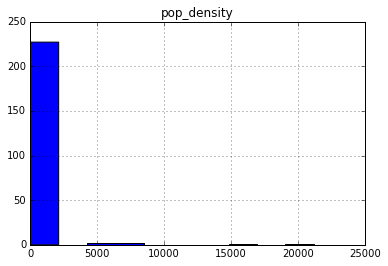

In [18]:
pd.read_sql_query("select (population/area_land) pop_density from facts",conn).hist()

In [22]:
pd.read_sql_query("select (area_land/area_water) as water_la,* from facts",conn)

,(area_land/area_water),id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,NaN,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,20.0,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,NaN,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,NaN,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,NaN,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,NaN,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,62.0,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,18.0,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,130.0,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,57.0,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56
